In [1]:
import pandas as pd,numpy as np
RecipeRLG=pd.read_csv('full_dataset.csv')

# Display the DataFrame
recipe_dummy_df=RecipeRLG

In [17]:

# Display the DataFrame
recipe_dummy_df=RecipeRLG

In [20]:
recipe_dummy_df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [22]:
# Basic statistics of numerical columns
recipe_dummy_df.describe()

,Unnamed: 0
count,2.231142e+06
mean,1.115570e+06
std,6.440754e+05
min,0.000000e+00
25%,5.577852e+05
50%,1.115570e+06
75%,1.673356e+06
max,2.231141e+06


In [23]:
recipe_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231142 entries, 0 to 2231141
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   title        object
 2   ingredients  object
 3   directions   object
 4   link         object
 5   source       object
 6   NER          object
dtypes: int64(1), object(6)
memory usage: 119.2+ MB


In [24]:
# # Distribution of ratings
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.hist(recipe_dummy_df['ratings'], bins=5, edgecolor='black')
# plt.title('Distribution of Ratings')
# plt.xlabel('Ratings')
# plt.ylabel('Frequency')
# plt.show()

In [26]:
# Count of unique ingredients and instructions
unique_ingredients = recipe_dummy_df['ingredients'].apply(lambda x: len(set(x.split(', ')))).sum()
unique_instructions = recipe_dummy_df['directions'].apply(lambda x: len(set(x.split(', ')))).sum()

unique_ingredients, unique_instructions

(23281941, 25195200)

In [27]:
from collections import Counter

# Ingredient Frequency
all_ingredients = [ingredient for sublist in recipe_dummy_df['ingredients'].apply(lambda x: x.split(', ')).tolist() for ingredient in sublist]
ingredient_count = Counter(all_ingredients)

ingredient_count

Counter({'["1 c. firmly packed brown sugar"': 88,
         '"1/2 c. evaporated milk"': 1488,
         '"1/2 tsp. vanilla"': 8831,
         '"1/2 c. broken nuts (pecans)"': 2,
         '"2 Tbsp. butter or margarine"': 2758,
         '"3 1/2 c. bite size shredded rice biscuits"]': 1,
         '["1 small jar chipped beef': 2,
         'cut up"': 13451,
         '"4 boned chicken breasts"': 13,
         '"1 can cream of mushroom soup"': 19727,
         '"1 carton sour cream"]': 90,
         '["2 (16 oz.) pkg. frozen corn"': 4,
         '"1 (8 oz.) pkg. cream cheese': 3375,
         'cubed"': 26354,
         '"1/3 c. butter': 700,
         '"1/2 tsp. garlic powder"': 4103,
         '"1/2 tsp. salt"': 73998,
         '"1/4 tsp. pepper"]': 3545,
         '["1 large whole chicken"': 15,
         '"2 (10 1/2 oz.) cans chicken gravy"': 2,
         '"1 (10 1/2 oz.) can cream of mushroom soup"': 331,
         '"1 (6 oz.) box Stove Top stuffing"': 4,
         '"4 oz. shredded cheese"]': 12,
       

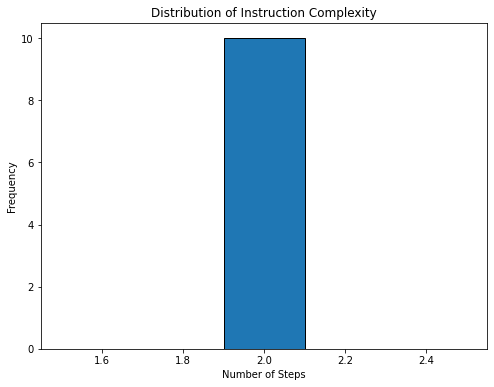

In [7]:
# Instruction Complexity
instruction_complexity = recipe_dummy_df['instructions'].apply(lambda x: len(x.split(', ')))

# Plotting the distribution of instruction complexity
plt.figure(figsize=(8, 6))
plt.hist(instruction_complexity, bins=5, edgecolor='black')
plt.title('Distribution of Instruction Complexity')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.show()

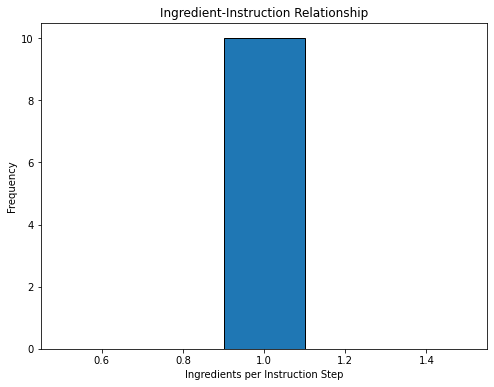

In [8]:
# Ingredient-Instruction Relationship

# Count of unique ingredients per instruction step
ingredient_instruction_relation = recipe_dummy_df.apply(lambda x: len(set(x['ingredients'].split(', '))) / len(set(x['instructions'].split(', '))), axis=1)

# Plotting the relationship
plt.figure(figsize=(8, 6))
plt.hist(ingredient_instruction_relation, bins=5, edgecolor='black')
plt.title('Ingredient-Instruction Relationship')
plt.xlabel('Ingredients per Instruction Step')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Display the first few rows of the dummy dataset
recipe_dummy_df.head()

,recipe_id,title,ingredients,instructions,ratings
0,1,Pasta,"ingredient1, ingredient2","Step 1, Step 2",2
1,2,Pizza,"ingredient3, ingredient4","Step 3, Step 4",5
2,3,Salad,"ingredient5, ingredient6","Step 5, Step 6",5
3,4,Soup,"ingredient7, ingredient8","Step 7, Step 8",2
4,5,Bread,"ingredient9, ingredient10","Step 9, Step 10",2


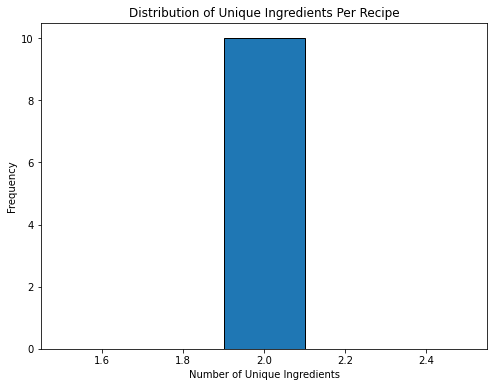

In [10]:
# Count of unique ingredients per recipe
ingredients_per_recipe = recipe_dummy_df['ingredients'].apply(lambda x: len(x.split(', ')))

# Plotting the distribution of unique ingredients per recipe
plt.figure(figsize=(8, 6))
plt.hist(ingredients_per_recipe, bins=5, edgecolor='black')
plt.title('Distribution of Unique Ingredients Per Recipe')
plt.xlabel('Number of Unique Ingredients')
plt.ylabel('Frequency')
plt.show()

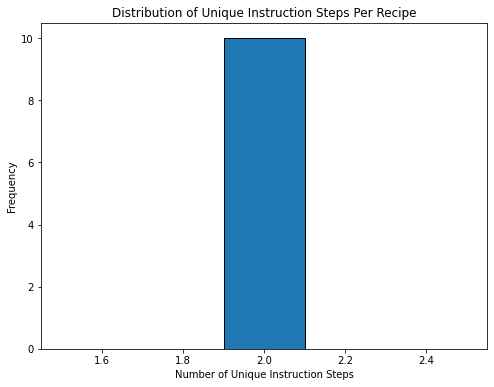

In [11]:
# Count of unique instruction steps per recipe
instructions_per_recipe = recipe_dummy_df['instructions'].apply(lambda x: len(x.split(', ')))

# Plotting the distribution of unique instruction steps per recipe
plt.figure(figsize=(8, 6))
plt.hist(instructions_per_recipe, bins=5, edgecolor='black')
plt.title('Distribution of Unique Instruction Steps Per Recipe')
plt.xlabel('Number of Unique Instruction Steps')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Extract ingredients for recipes containing 'Pizza' in the title
pizza_ingredients = recipe_dummy_df[recipe_dummy_df['title'].str.contains('Pizza', case=False)]['ingredients'].apply(lambda x: x.split(', ')).tolist()

# Flatten the list of lists to a single list
all_pizza_ingredients = [ingredient for sublist in pizza_ingredients for ingredient in sublist]

# Count the occurrences of each ingredient in Pizza recipes
common_pizza_ingredients = Counter(all_pizza_ingredients)

common_pizza_ingredients

Counter({'ingredient3': 1, 'ingredient4': 1})

In [13]:
# Extract instruction steps for recipes containing 'Pizza' in the title
pizza_instructions = recipe_dummy_df[recipe_dummy_df['title'].str.contains('Pizza', case=False)]['instructions'].apply(lambda x: x.split(', ')).tolist()

# Flatten the list of lists to a single list
all_pizza_instructions = [instruction for sublist in pizza_instructions for instruction in sublist]

# Count the occurrences of each instruction step in Pizza recipes
common_pizza_instructions = Counter(all_pizza_instructions)

common_pizza_instructions

Counter({'Step 3': 1, 'Step 4': 1})

In [14]:
# Modifying the dummy data to represent ingredients and instructions as arrays (lists in Python)
recipe_dummy_df['ingredients'] = recipe_dummy_df['ingredients'].apply(lambda x: x.split(', '))
recipe_dummy_df['instructions'] = recipe_dummy_df['instructions'].apply(lambda x: x.split(', '))

# Display the first few rows of the modified dummy dataset
recipe_dummy_df.head()

,recipe_id,title,ingredients,instructions,ratings
0,1,Pasta,"[ingredient1, ingredient2]","[Step 1, Step 2]",2
1,2,Pizza,"[ingredient3, ingredient4]","[Step 3, Step 4]",5
2,3,Salad,"[ingredient5, ingredient6]","[Step 5, Step 6]",5
3,4,Soup,"[ingredient7, ingredient8]","[Step 7, Step 8]",2
4,5,Bread,"[ingredient9, ingredient10]","[Step 9, Step 10]",2


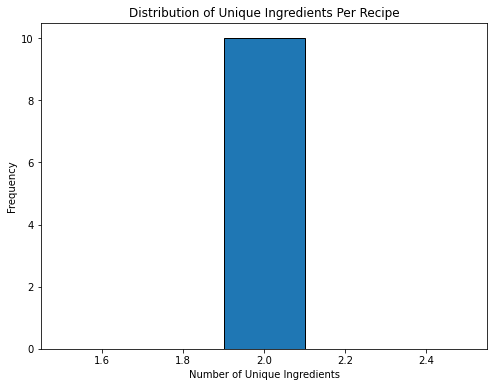

In [15]:
# Update the code to count unique ingredients per recipe when ingredients are in list form
ingredients_per_recipe = recipe_dummy_df['ingredients'].apply(lambda x: len(set(x)))

# Plotting the distribution of unique ingredients per recipe
plt.figure(figsize=(8, 6))
plt.hist(ingredients_per_recipe, bins=5, edgecolor='black')
plt.title('Distribution of Unique Ingredients Per Recipe')
plt.xlabel('Number of Unique Ingredients')
plt.ylabel('Frequency')
plt.show()

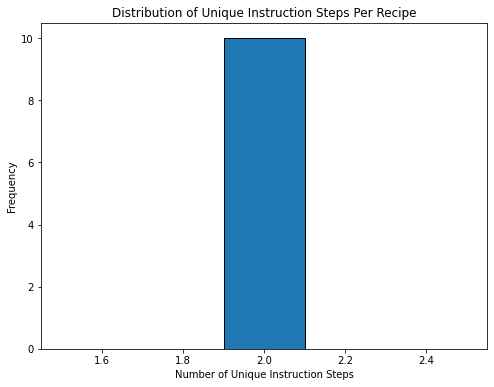

In [16]:
# Update the code to count unique instruction steps per recipe when instructions are in list form
instructions_per_recipe = recipe_dummy_df['instructions'].apply(lambda x: len(set(x)))

# Plotting the distribution of unique instruction steps per recipe
plt.figure(figsize=(8, 6))
plt.hist(instructions_per_recipe, bins=5, edgecolor='black')
plt.title('Distribution of Unique Instruction Steps Per Recipe')
plt.xlabel('Number of Unique Instruction Steps')
plt.ylabel('Frequency')
plt.show()